In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

In [2]:
test_data = np.array(pd.read_csv('Fashion_MNIST/fashion-mnist_test.csv'), dtype='float32')

In [3]:
embed_count = 1600 #number of images on embedding
x_test = test_data[:embed_count, 1:]/255
y_test = test_data[:embed_count, 0]

logdir = '/home/leshen/Desktop/Deep_learning/logs/Embeddings/'

In [4]:
summary_writer = tf.summary.FileWriter(logdir)

embedding_var = tf.Variable(x_test, name='fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend((28, 28))

projector.visualize_embeddings(summary_writer, config)

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sess, os.path.join(logdir, 'model.ckpt'))

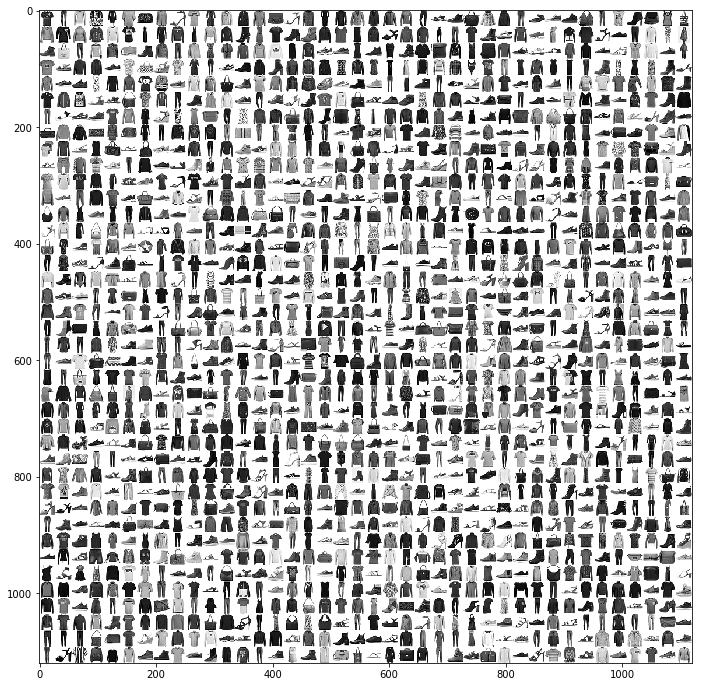

In [6]:
rows, cols = 28, 28
label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boat']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        labels.append(label[int(y_test[index])])
        sprite_image[
            i * cols: (i + 1) * cols, 
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1

with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLable\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))

plt.figure(figsize=(12, 12))
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap = 'gray')
plt.show()